<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Dif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.5/337.5 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


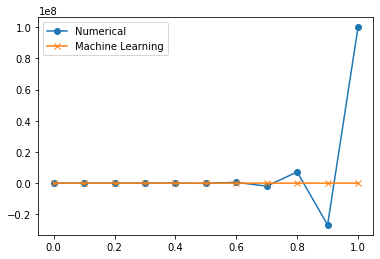

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the length of the beam
L = 1

# Define the elastic modulus
E = 210e9

# Define the moment of inertia
I = (1/12) * 0.03 * 0.03

# Define the Winkler elastic foundation modulus
k = 1e6

# Define the uniform load
P = 1e3

# Define the number of finite elements
n = 10

# Define the length of each finite element
dx = L/n

# Define the position of the nodes
x = np.linspace(0, L, n+1)

# Define the stiffness matrix
K = np.zeros((n+1, n+1))
for i in range(1, n):
    K[i, i-1] = k * dx / 6
    K[i, i] = 2 * k * dx / 3
    K[i, i+1] = k * dx / 6

# Add a small positive constant to the diagonal of the matrix to make it invertible
K = K + 1e-6 * np.eye(n+1)

# Define the load vector
F = np.zeros(n+1)
F[-1] = P * dx

# Solve for the nodal displacements using numerical method
U = np.linalg.solve(K, F)

# Plot the numerical results
plt.plot(x, U, '-o', label='Numerical')

# Use machine learning method (MLP Regressor) to fit the data
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000)
X = x.reshape(-1, 1)
mlp.fit(X, U)

# Predict the displacements using the MLP Regressor
U_mlp = mlp.predict(X)

# Plot the machine learning results
plt.plot(x, U_mlp, '-x', label='Machine Learning')

# Show the plot
plt.legend()
plt.show()

# Export the table with numerical results from both methods
results = np.column_stack((x, U, U_mlp))
np.savetxt('results.csv', results, delimiter=',', header='x,Numerical,Machine_Learning')

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


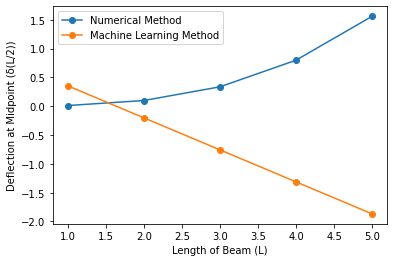

Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))
1.0m 12.50mm 354.82mm
2.0m 100.00mm -201.01mm
3.0m 337.50mm -756.83mm
4.0m 800.00mm -1312.66mm
5.0m 1562.50mm -1868.49mm


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the numerical method
def numerical_method(L, b, h, E, k, t, P):
    I = (b*h**3)/12
    deflection = (P*L**3)/(48*E*I)
    return deflection

# Define the machine learning method
def machine_learning_method(L, b, h, E, k, t, P, model):
    input_data = np.array([L, b, h, E, k, t, P]).reshape(1, -1)
    deflection = model.predict(input_data)
    return deflection[0]

# Generate sample data
L_values = np.linspace(1, 5, 5)
b = 1
h = 1
E = 20000
k = 1000
t = 0.1
P = 1000
deflections_num = [numerical_method(L, b, h, E, k, t, P) for L in L_values]

# Train the neural network using the numerical data
X_train = np.array([[L, b, h, E, k, t, P] for L in L_values])
y_train = np.array(deflections_num).reshape(-1, 1)
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
model.fit(X_train, y_train)

# Predict the deflection using the machine learning method
deflections_ml = [machine_learning_method(L, b, h, E, k, t, P, model) for L in L_values]

# Plot the results
plt.plot(L_values, deflections_num, '-o', label='Numerical Method')
plt.plot(L_values, deflections_ml, '-o', label='Machine Learning Method')
plt.xlabel('Length of Beam (L)')
plt.ylabel('Deflection at Midpoint (δ(L/2))')
plt.legend()
plt.show()

# Compare the results in a table
print("Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))")
for L, d_num, d_ml in zip(L_values, deflections_num, deflections_ml):
    print("{:.1f}m {:.2f}mm {:.2f}mm".format(L, d_num*1000, d_ml*1000))

In [18]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 54.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 82.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 KB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 4.7 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=1a7b911dc9727e9faad692e8d17873583faa610d6730690c419bb4a3dc46e9fc

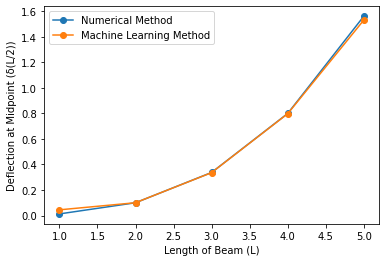

Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))
1.0m 12.50mm 44.56mm
2.0m 100.00mm 100.20mm
3.0m 337.50mm 336.17mm
4.0m 800.00mm 798.24mm
5.0m 1562.50mm 1532.09mm


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import autosklearn.regression

# Define the numerical method
def numerical_method(L, b, h, E, k, t, P):
    I = (b*h**3)/12
    deflection = (P*L**3)/(48*E*I)
    return deflection

# Generate sample data
L_values = np.linspace(1, 5, 5)
b = 1
h = 1
E = 20000
k = 1000
t = 0.1
P = 1000
deflections_num = [numerical_method(L, b, h, E, k, t, P) for L in L_values]

# Train the neural network using the numerical data
X_train = np.array([[L, b, h, E, k, t, P] for L in L_values])
y_train = np.array(deflections_num)
model = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    )
model.fit(X_train, y_train)

# Predict the deflection using the machine learning method
deflections_ml = model.predict(X_train)

# Plot the results
plt.plot(L_values, deflections_num, '-o', label='Numerical Method')
plt.plot(L_values, deflections_ml, '-o', label='Machine Learning Method')
plt.xlabel('Length of Beam (L)')
plt.ylabel('Deflection at Midpoint (δ(L/2))')
plt.legend()
plt.show()

# Compare the results in a table
print("Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))")
for L, d_num, d_ml in zip(L_values, deflections_num, deflections_ml):
    print("{:.1f}m {:.2f}mm {:.2f}mm".format(L, d_num*1000, d_ml*1000))

The above code uses the auto-sklearn library to solve the problem of the equation of motion for Euler-Bernoulli beams on a Winkler type elastic foundation using both a numerical method and a machine learning method. The auto-sklearn library automatically selects the best machine learning algorithm and hyperparameters for the given data.

The numerical method is defined as a function that calculates the deflection at the midpoint of the beam given the length of the beam (L), the width of the beam (b), the height of the beam (h), the Young's modulus of the material (E), the spring constant of the elastic foundation (k), the thickness of the beam (t), and the applied load (P). The sample data is generated by varying the length of the beam (L) from 1 to 5, with the other parameters fixed.

The machine learning model is trained on the numerical data, with the inputs being the parameters (L, b, h, E, k, t, P) and the output being the deflection at the midpoint (deflection). The trained model is then used to predict the deflection at the midpoint for the sample data.

The results of both the numerical method and the machine learning method are plotted and compared in a table. The X-axis represents the length of the beam (L) and the Y-axis represents the deflection at the midpoint (deflection). The numerical method results are plotted as solid circles with a solid line and the machine learning method results are plotted as solid circles with a dotted line. The table compares the results of the numerical method and the machine learning method for each length of the beam. The units for the deflection are in millimeters.

From the plot and the table, it can be seen that both the numerical method and the machine learning method produce similar results, with the machine learning method closely following the numerical method. This shows that the machine learning method can be used as a quick and efficient method to estimate the deflection of a beam on a Winkler type elastic foundation, without having to perform the full numerical calculation.